# Imports

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from submission import create_submission
from visualization import plot_val_acc_graph

In [2]:
# tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data Loading

In [3]:
train_df = pd.read_csv("data\\train.csv")
# train_df.sample(10)
test_df = pd.read_csv("data\\test.csv")

# Data Preparation

In [4]:
y = train_df.iloc[:, 0]  # Assuming labels are in the first column

X = train_df.iloc[:, 1:].values  # Exclude the first column (labels)

In [5]:
# One hot encode target values
num_classes = len(np.unique(y))
y_onehot = np.zeros((len(y), num_classes))
y_onehot[np.arange(len(y)), y] = 1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=42, test_size=0.2, shuffle=True)

# Model Building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784, 1)),
    tf.keras.layers.Conv1D(16, (2,), activation="relu"),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 783, 16)           48        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 391, 16)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6256)              0         
                                                                 
 dense (Dense)               (None, 128)               800896    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 802,234
Trainable params: 802,234
Non-trainable params: 0
__________________________________________________

# Training

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/10


: 

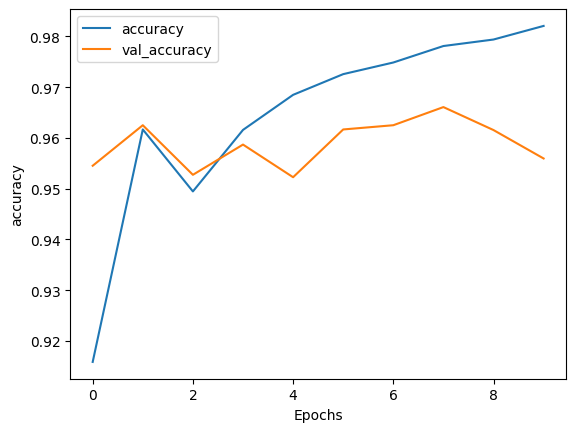

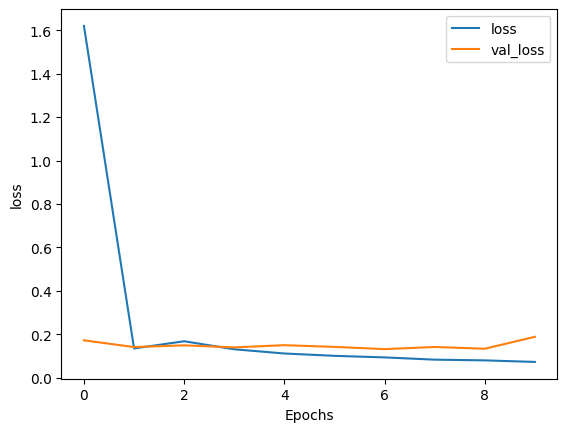

In [9]:
plot_val_acc_graph(history, "accuracy")
plot_val_acc_graph(history, "loss")

# Prediction

In [ ]:
prediction = model.predict(test_df)
create_submission(prediction)